## Medical Data Set Exploration

In [115]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

## Loading and Preprocessing Medical Data Set

In [116]:
# Loading data
file_path = Path("../Resources/Medicaldataset_backup.csv")
df_medi = pd.read_csv(file_path)
df_medi.head()


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [117]:
df_medi.dtypes

Age                           int64
Gender                        int64
Heart rate                    int64
Systolic blood pressure       int64
Diastolic blood pressure      int64
Blood sugar                 float64
CK-MB                       float64
Troponin                    float64
Result                       object
dtype: object

In [118]:
# Define features set
X = df_medi.copy()
#X.drop(["Patient ID","Blood Pressure","Blood Pressure","Country","Continent"], axis=1, inplace=True)
X.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [119]:
# Result Convert categorical column to binary (dummy) variables
df_dummies = pd.get_dummies(X['Result'], prefix='Result')
X.drop(["Result"], axis=1, inplace=True)
# Concatenate the dummy variables with the original DataFrame
X = pd.concat([X, df_dummies], axis=1)
X.head()


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result_negative,Result_positive
0,64,1,66,160,83,160.0,1.80,0.012,True,False
1,21,1,94,98,46,296.0,6.75,1.060,False,True
2,55,1,64,160,77,270.0,1.99,0.003,True,False
3,64,1,70,120,55,270.0,13.87,0.122,False,True
4,55,1,64,112,65,300.0,1.08,0.003,True,False


In [120]:
# Define target vector
y = X["Heart rate"].ravel()
y[:5]

array([66, 94, 64, 70, 64])

In [121]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [122]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [123]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [124]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [125]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [126]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [127]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [128]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
print(cm)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
cm_df.head()
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


ValueError: Shape of passed values is (61, 61), indices imply (2, 2)

In [129]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


NameError: name 'cm_df' is not defined

## Feature Importance

In [130]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.3762601142791903, 'Heart rate'),
 (0.12555867001542398, 'Systolic blood pressure'),
 (0.11985520280280128, 'Diastolic blood pressure'),
 (0.0894418116550956, 'CK-MB'),
 (0.08814844013823177, 'Blood sugar'),
 (0.0806990515234356, 'Age'),
 (0.07779940083692428, 'Troponin'),
 (0.019677943494562585, 'Gender'),
 (0.011314834305124153, 'Result_negative'),
 (0.011244530949210381, 'Result_positive')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

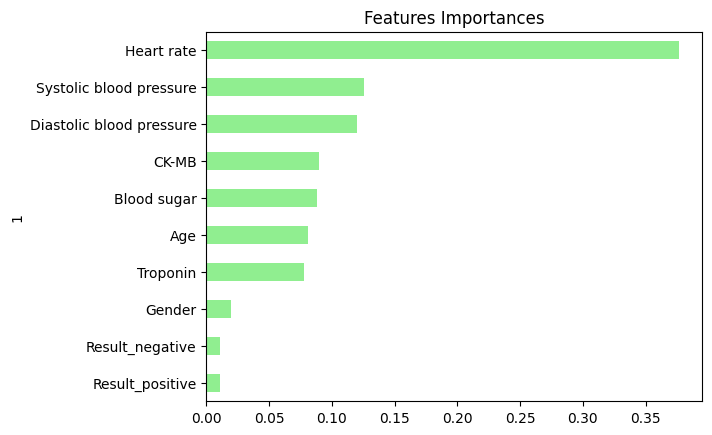

In [131]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)